From G.Gong: CMU; Mostly Boolean or numeric-valued attribute types; Includes cost data (donated by Peter Turney). https://archive.ics.uci.edu/dataset/46/hepatitis

### Import the required packages

In [124]:
# Load Our EDA Pkgs
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
# ML Pkg
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Deployment
import joblib
from IPython.display import Image
from sklearn import tree
import pydotplus

### Data Undestanding

- **Class:** DIE, LIVE
- **AGE:** 10, 20, 30, 40, 50, 60, 70, 80
- **SEX:** Male, Female
- **STEROID:** No, Yes
- **ANTIVIRALS:** No, Yes
- **FATIGUE:** No, Yes
- **MALAISE:** No, Yes
- **ANOREXIA:** No, Yes
- **LIVER BIG:** No, Yes
- **LIVER FIRM:** No, Yes
- **SPLEEN PALPABLE:** No, Yes
- **SPIDERS:** No, Yes
- **ASCITES:** No, Yes
- **VARICES:** No, Yes
- **BILIRUBIN:** 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
- **ALK PHOSPHATE:** 33, 80, 120, 160, 200, 250
- **SGOT:** 13, 100, 200, 300, 400, 500,
- **ALBUMIN:** 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
- **PROTIME:** 10, 20, 30, 40, 50, 60, 70, 80, 90
- **HISTOLOGY:** No, Yes

In [2]:
#Loading the dataset
df = pd.read_csv('data\hepatitis.data')

In [3]:
#checking the data shape
df.shape

(154, 20)

In [4]:
#checking the first five records in the dataset
df.head()

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [5]:
col_names = ["Class","AGE","SEX","STEROID","ANTIVIRALS","FATIGUE","MALAISE","ANOREXIA","LIVER BIG","LIVER FIRM","SPLEEN PALPABLE","SPIDERS","ASCITES","VARICES","BILIRUBIN","ALK PHOSPHATE","SGOT","ALBUMIN","PROTIME","HISTOLOGY"]

In [6]:
#Combining the column headers with the associated columns 
df = pd.read_csv("data/hepatitis.data",names=col_names)

In [7]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [8]:
# Clean our Column Names
df.columns

Index(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')

In [9]:
# Convert ot lowercase
df.columns.str.lower().str.replace(' ','_')

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [10]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [11]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [12]:
# Data Types
df.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [13]:
#check missing values
df.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

In [14]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [15]:
# Replace ? with 0
df = df.replace('?',0)

In [16]:
#converting the objects to type integer
df[['steroid', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'alk_phosphate', 'sgot',
       'protime']] = df[['steroid', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'alk_phosphate', 'sgot',
       'protime']].astype(int)

bilirubin and albumin could not be converted to integer because they appeared like decimals although they strings.

In [17]:
df[['bilirubin', 'albumin']] = df[['bilirubin', 'albumin']].astype(float)

In [18]:
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.7,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1


### Exploratory Data Analysis

In [19]:
#Data summary
df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


#### Target Label

In [20]:
#Target Lable
target_label = {"Die":1, "Live":2}

In [22]:
#value counts
df['class'].value_counts()

2    123
1     32
Name: class, dtype: int64

<AxesSubplot:ylabel='class'>

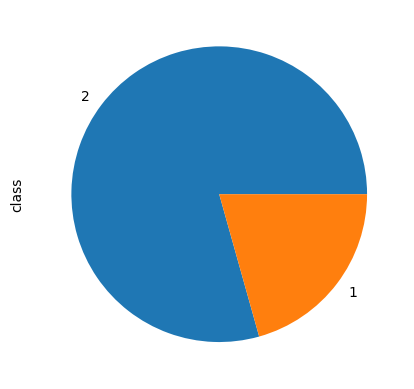

In [23]:
df['class'].value_counts().plot(kind='pie')

#### Sex

In [25]:
df['sex'].unique()

array([2, 1], dtype=int64)

In [26]:
#value counts
df['sex'].value_counts()

1    139
2     16
Name: sex, dtype: int64

<AxesSubplot:ylabel='sex'>

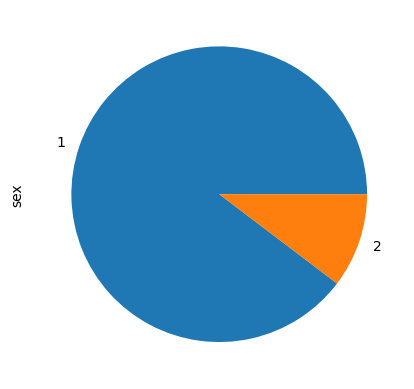

In [30]:
df['sex'].value_counts().plot(kind='pie')

#### Age

<function matplotlib.pyplot.show(close=None, block=None)>

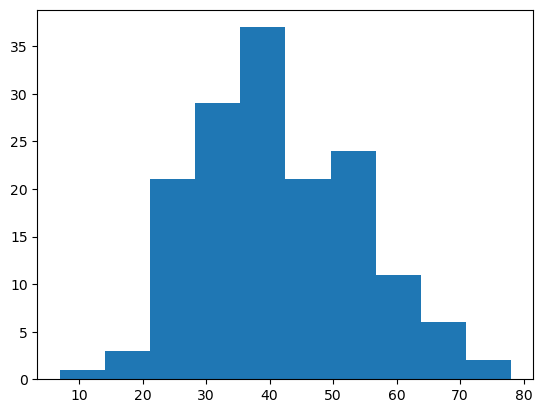

In [32]:
plt.hist(df['age'])
plt.show


C:\Users\Hp 2022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

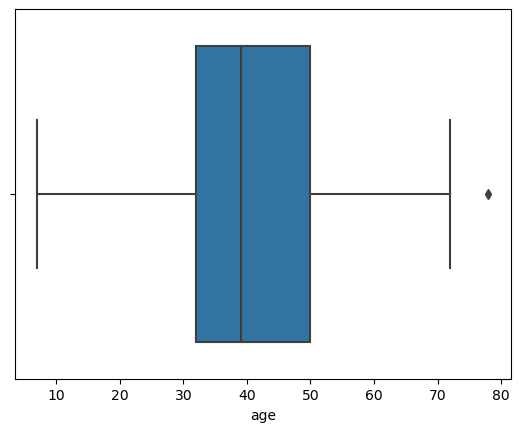

In [33]:
sns.boxplot(df['age'])

C:\Users\Hp 2022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alk_phosphate'>

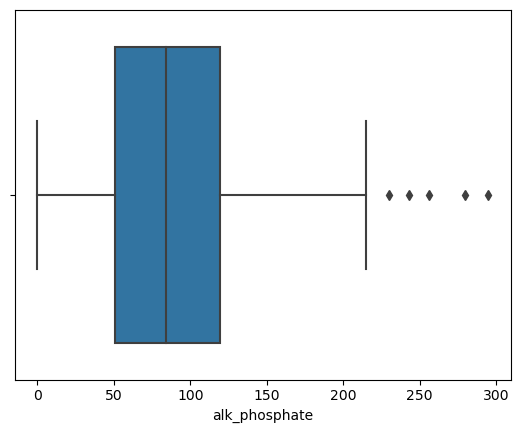

In [34]:
sns.boxplot(df['alk_phosphate'])

C:\Users\Hp 2022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sgot'>

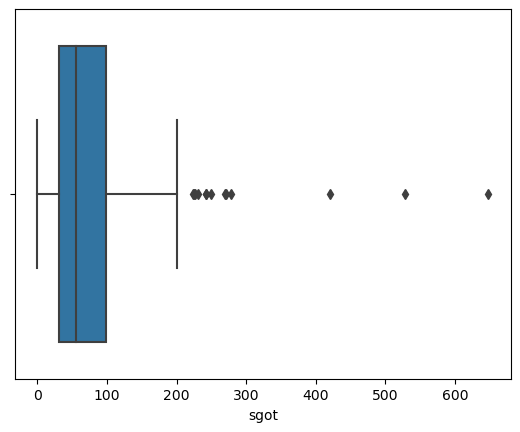

In [35]:
sns.boxplot(df['sgot'])


C:\Users\Hp 2022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='albumin'>

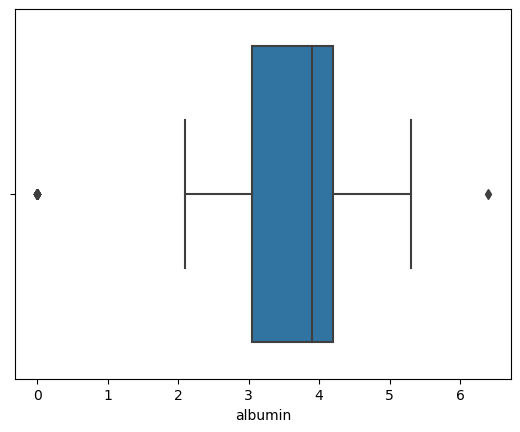

In [36]:
sns.boxplot(df['albumin'])

C:\Users\Hp 2022\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='protime'>

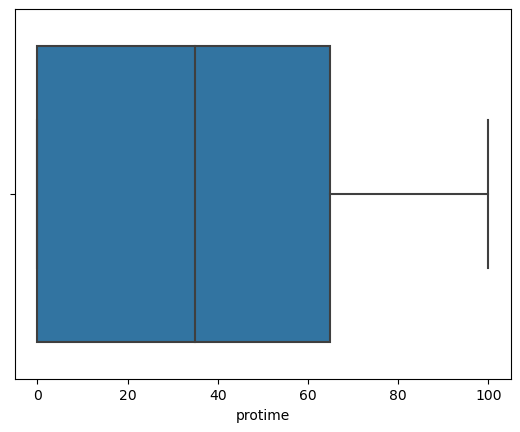

In [37]:
sns.boxplot(df['protime'])

#### Bivariate Analysis

<AxesSubplot:xlabel='albumin', ylabel='age'>

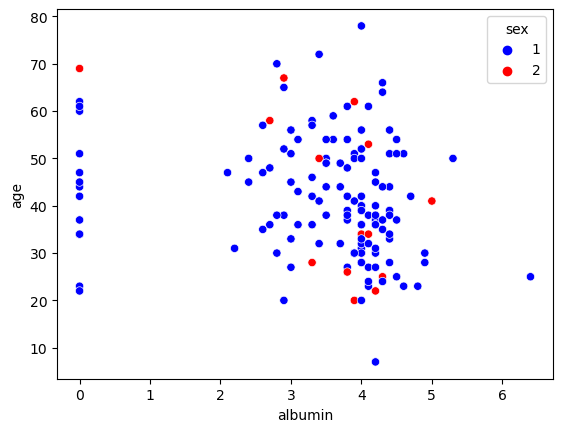

In [39]:
sns.scatterplot(x=df['albumin'], y=df['age'], hue = df['sex'], palette=['blue', 'red'], data = df)

<AxesSubplot:xlabel='alk_phosphate', ylabel='age'>

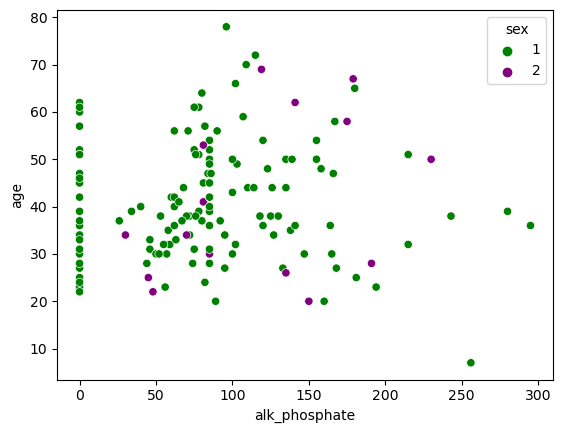

In [40]:
sns.scatterplot(x=df['alk_phosphate'], y=df['age'], hue = df['sex'], palette=['green', 'purple'], data = df)

### Data Preprocessing

#### Analysis of outliers

In [42]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1

In [43]:
### Get the actual datapoint that is an outlier
(df < (q1 -1.5 * IQR)) | (df >(q3 + 1.5 * IQR))

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,True,False,False,False
151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
152,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
153,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False


In [45]:
# Data points with tru outliers
df_no_outlier = df[~((df < (q1 -1.5 * IQR)) | (df >(q3 + 1.5 * IQR))).any(axis=1)]
df_no_outlier.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.7,0,48,4.4,0,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,120,3.9,0,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1


In [46]:
#total records
df.shape

(155, 20)

In [47]:
#Outliers
df_no_outlier.shape

(43, 20)

### Feature Engineering

- SelectKbest
- Recursive Feature Elimination

In [50]:
x = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]
y = df['class']

In [52]:
#using selectKBest
skb = SelectKBest(score_func = chi2, k = 10)
best_feature_fit = skb.fit(x, y)

In [54]:
#Highest score shows the best fit
print("Score", best_feature_fit.scores_)

Score [ 28.47481919   0.38948319   0.3995129    0.18634161   2.34643234
   2.46803203   0.19648065   0.31698209   0.9867095    0.74535155
   3.18940804   2.09639954   1.12812176  30.10247172  17.88270548
  47.38820795   6.87318606 130.18332457   3.01854675]


In [55]:
#Transform the features
tf = best_feature_fit.transform(x)

In [56]:
tf

array([[30. ,  2. ,  2. , ...,  4. ,  0. ,  1. ],
       [50. ,  1. ,  2. , ...,  3.5,  0. ,  1. ],
       [78. ,  1. ,  2. , ...,  4. ,  0. ,  1. ],
       ...,
       [61. ,  1. ,  1. , ...,  4.1,  0. ,  2. ],
       [53. ,  1. ,  2. , ...,  4.1, 48. ,  2. ],
       [43. ,  1. ,  2. , ...,  3.1, 42. ,  2. ]])

In [58]:
#Mapping the transformed features to actual names
feature_scores = pd.DataFrame(best_feature_fit.scores_,columns = ['Feature_Scores'])

In [59]:
feature_scores

,Feature_Scores
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [60]:
#include the feature names
feature_column_names = pd.DataFrame(x.columns, columns = ['Feature_Scores'])
best_feature_df = pd.concat([feature_scores, feature_column_names], axis = 1)

In [65]:
best_feature_df

,Feature_Scores,Feature_Scores
0,28.474819,age
1,0.389483,sex
2,0.399513,steroid
3,0.186342,antivirals
4,2.346432,fatigue
5,2.468032,malaise
6,0.196481,anorexia
7,0.316982,liver_big
8,0.986710,liver_firm
9,0.745352,spleen_palpable


In [71]:
print(len(best_feature_df))
print(best_feature_df.empty)

19
False


### Model Engineering

#### Rebursive Feature Elimination

In [74]:
lr = LogisticRegression()

In [76]:
rfe = RFE(lr)

In [77]:
rfe_fit = rfe.fit(x, y)

C:\Users\Hp 2022\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp 2022\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

In [78]:
# Selection
selected_features = pd.DataFrame(rfe_fit.support_,columns=['Selected_Features'])
ranking_features = pd.DataFrame(rfe_fit.ranking_,columns=['ranking_Features'])

In [79]:
rfe_feature_df = pd.concat([feature_column_names,selected_features,ranking_features],axis=1)

In [80]:
rfe_feature_df

,Feature_Scores,Selected_Features,ranking_Features
0,age,False,7
1,sex,True,1
2,steroid,False,4
3,antivirals,False,8
4,fatigue,True,1
5,malaise,True,1
6,anorexia,True,1
7,liver_big,False,3
8,liver_firm,False,5
9,spleen_palpable,False,6


RFE eliminates the least ranking

#### Checking for Feature Importance

In [83]:
#Uisng ExtraTreeClassifier
# Init
et_clf = ExtraTreesClassifier()
et_clf.fit(x,y)

ExtraTreesClassifier()

In [84]:
# Print Important
print(et_clf.feature_importances_)

[0.05864492 0.0242406  0.0265709  0.00888067 0.0316177  0.04459767
 0.02811181 0.03822113 0.04796553 0.0395647  0.06929685 0.1030452
 0.05214965 0.11188681 0.06908933 0.05531331 0.07366438 0.06296822
 0.05417064]


In [86]:
feature_imporance_df = pd.Series(et_clf.feature_importances_,index=x.columns)

In [87]:
feature_imporance_df

age                0.058645
sex                0.024241
steroid            0.026571
antivirals         0.008881
fatigue            0.031618
malaise            0.044598
anorexia           0.028112
liver_big          0.038221
liver_firm         0.047966
spleen_palpable    0.039565
spiders            0.069297
ascites            0.103045
varices            0.052150
bilirubin          0.111887
alk_phosphate      0.069089
sgot               0.055313
albumin            0.073664
protime            0.062968
histology          0.054171
dtype: float64

<AxesSubplot:>

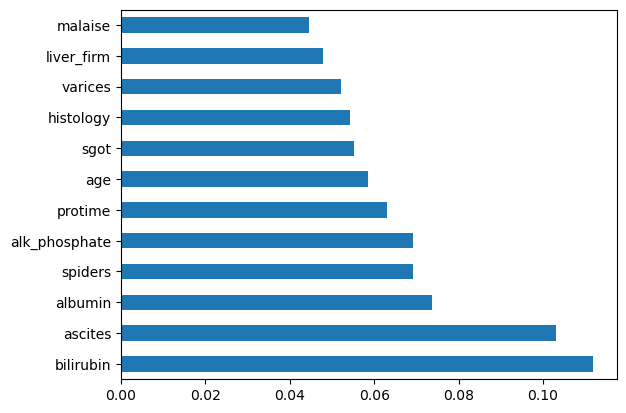

In [88]:
feature_imporance_df.nlargest(12).plot(kind='barh')

In [89]:
# Correlation
df.corr()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
class,1.000000,-0.219647,0.173051,0.121140,-0.130196,0.292206,0.315970,0.110715,0.102151,0.154736,0.180894,0.330194,0.332796,0.249610,-0.424523,-0.050806,-0.056679,0.296489,0.154688,-0.337856
age,-0.219647,1.000000,0.008126,-0.067710,-0.013100,-0.264635,-0.099516,0.100589,-0.126358,-0.100979,-0.127258,-0.206551,-0.125020,-0.114412,0.095626,0.045328,0.078021,-0.191174,-0.059956,0.170780
sex,0.173051,0.008126,1.000000,-0.039222,-0.089249,-0.063947,-0.020895,0.025186,0.023634,0.015750,-0.078414,-0.065592,0.049516,-0.005045,-0.039341,0.162851,-0.008991,-0.018906,0.067128,-0.137450
steroid,0.121140,-0.067710,-0.039222,1.000000,0.101657,0.146292,0.232041,0.084752,0.159877,0.095280,0.071401,0.029781,-0.002593,-0.029759,-0.005835,-0.042245,-0.021032,0.203109,0.032994,-0.070144
antivirals,-0.130196,-0.013100,-0.089249,0.101657,1.000000,-0.065578,-0.026703,-0.052554,-0.060626,-0.019871,-0.183070,-0.176367,-0.176382,-0.167721,0.177958,0.041764,0.095980,-0.153939,-0.276452,0.209242
fatigue,0.292206,-0.264635,-0.063947,0.146292,-0.065578,1.000000,0.617660,0.419991,0.168796,0.254621,0.226850,0.380935,0.288877,0.217311,-0.243964,-0.110505,-0.175476,0.198983,0.073783,-0.131177
malaise,0.315970,-0.099516,-0.020895,0.232041,-0.026703,0.617660,1.000000,0.631662,0.192556,0.197903,0.145236,0.376666,0.376182,0.267029,-0.269910,-0.114810,-0.177297,0.224605,0.067186,-0.116964
anorexia,0.110715,0.100589,0.025186,0.084752,-0.052554,0.419991,0.631662,1.000000,0.185164,0.144556,0.185004,0.371874,0.301514,0.288883,-0.244095,0.035984,-0.188183,0.133743,0.108322,-0.049702
liver_big,0.102151,-0.126358,0.023634,0.159877,-0.060626,0.168796,0.192556,0.185164,1.000000,0.698517,0.338963,0.370229,0.339108,0.238645,-0.028856,0.018895,-0.026293,0.105555,0.174677,-0.104757
liver_firm,0.154736,-0.100979,0.015750,0.095280,-0.019871,0.254621,0.197903,0.144556,0.698517,1.000000,0.322955,0.407114,0.310338,0.295100,-0.069352,-0.179977,-0.149876,0.059700,0.083312,-0.206632


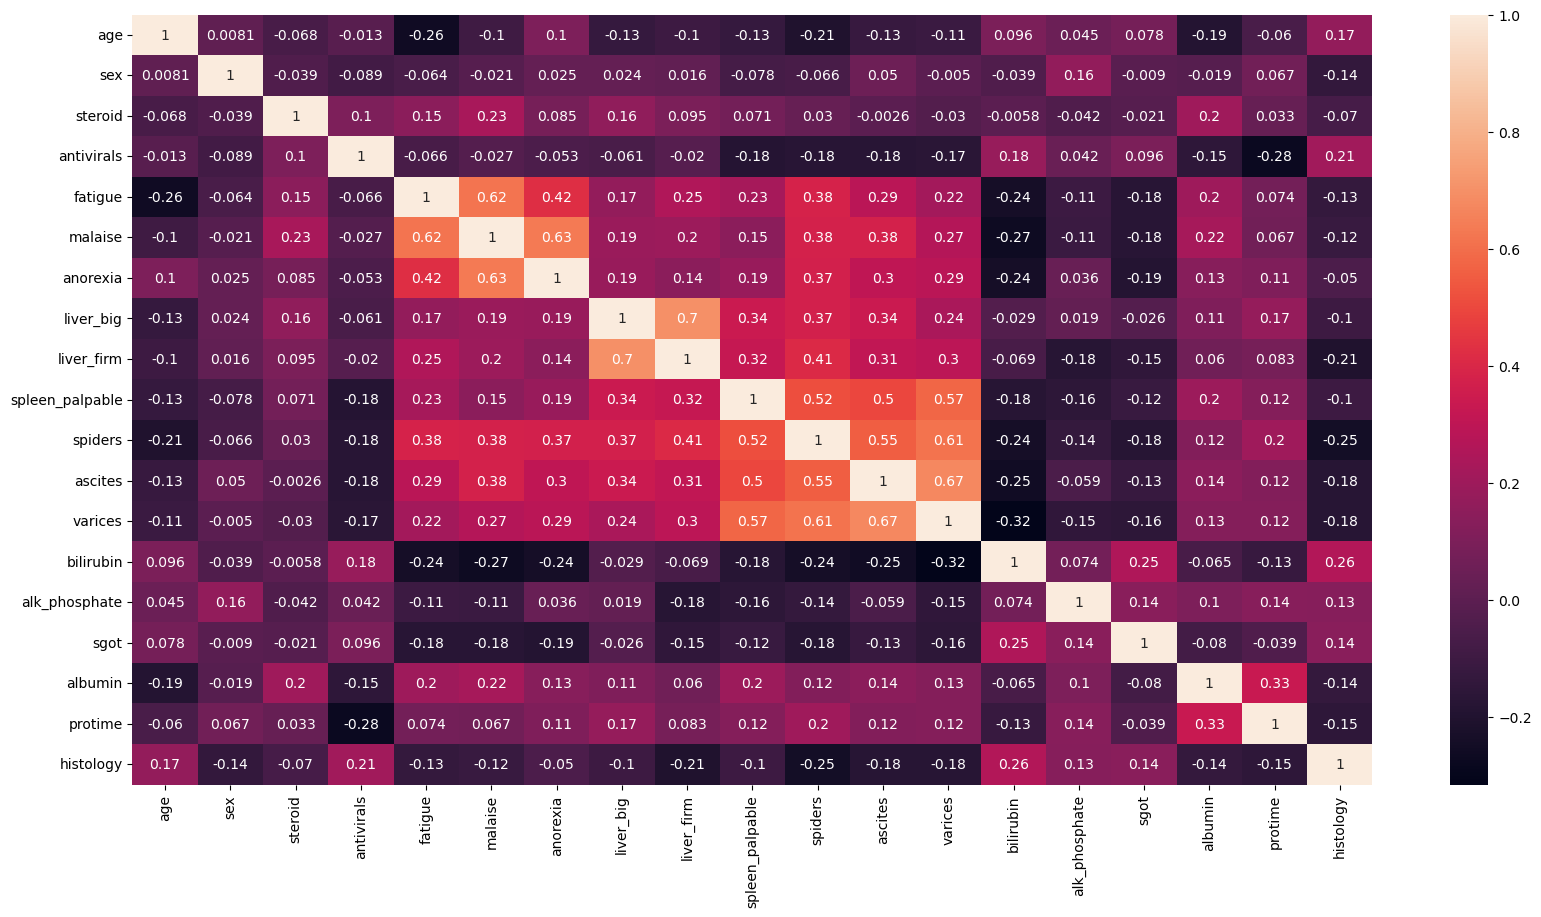

In [91]:
# Heatmap for Correlation with Annot
plt.figure(figsize=(20,10))
sns.heatmap(x.corr(),annot=True)
plt.show()

### Model Building

In [93]:
x_best = df[['age', 'sex', 'steroid', 'antivirals','fatigue','spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]

In [94]:
# train /test dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=7)

In [96]:
# train /test dataset for best features
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(x,y,test_size=0.30,random_state=7)

#### Logistic Regression

In [97]:
# Building Model
lrg = LogisticRegression()
lrg.fit(x_train,y_train)

C:\Users\Hp 2022\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
y_pred = lrg.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.50      0.15      0.24        13
           2       0.74      0.94      0.83        34

    accuracy                           0.72        47
   macro avg       0.62      0.55      0.53        47
weighted avg       0.68      0.72      0.67        47



In [104]:
# Building Model using the best features
mlrg = LogisticRegression()
mlrg.fit(x_train_b,y_train_b)

C:\Users\Hp 2022\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [106]:
y_pred = lrg.predict(x_test_b)
report = classification_report(y_test_b, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.50      0.15      0.24        13
           2       0.74      0.94      0.83        34

    accuracy                           0.72        47
   macro avg       0.62      0.55      0.53        47
weighted avg       0.68      0.72      0.67        47



In [107]:
### Single Prediction
x_test.iloc[1]

age                 58.0
sex                  1.0
steroid              2.0
antivirals           2.0
fatigue              1.0
malaise              2.0
anorexia             2.0
liver_big            1.0
liver_firm           1.0
spleen_palpable      1.0
spiders              1.0
ascites              2.0
varices              2.0
bilirubin            2.0
alk_phosphate      167.0
sgot               242.0
albumin              3.3
protime              0.0
histology            1.0
Name: 76, dtype: float64

#### Decision Tree Classifier

In [108]:
clf = DecisionTreeClassifier()

In [109]:
# Fit
clf.fit(x_train_b,y_train_b)

DecisionTreeClassifier()

In [110]:
y_pred = clf.predict(x_test_b)
report = classification_report(y_test_b, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.67      0.46      0.55        13
           2       0.82      0.91      0.86        34

    accuracy                           0.79        47
   macro avg       0.74      0.69      0.70        47
weighted avg       0.77      0.79      0.77        47



#### Random Forest Classifier

In [114]:
rf = RandomForestClassifier()
rf.fit(x_train_b,y_train_b)

RandomForestClassifier()

In [115]:
y_pred = rf.predict(x_test_b)
report = classification_report(y_test_b, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.75      0.46      0.57        13
           2       0.82      0.94      0.88        34

    accuracy                           0.81        47
   macro avg       0.79      0.70      0.72        47
weighted avg       0.80      0.81      0.79        47



#### KNN Classifier

In [118]:
knn = KNeighborsClassifier()
knn.fit(x_train_b,y_train_b)

KNeighborsClassifier()

In [119]:
y_pred = knn.predict(x_test_b)
report = classification_report(y_test_b, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           2       0.72      1.00      0.84        34

    accuracy                           0.72        47
   macro avg       0.36      0.50      0.42        47
weighted avg       0.52      0.72      0.61        47



C:\Users\Hp 2022\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp 2022\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp 2022\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Deployment

In [125]:
model_file = open("lr_hepatitisB_model.pkl","wb")
joblib.dump(mlrg,model_file)
model_file.close()

In [127]:
model_knn = open("knn_hepatitisB_model.pkl","wb")
joblib.dump(knn,model_knn)
model_knn.close()

In [130]:
model_clf = open("dt_clf_hepatitisB_model.pkl","wb")
joblib.dump(clf,model_clf)
model_clf.close()

In [132]:
model_rf = open("rf_hepatitisB_model.pkl","wb")
joblib.dump(rf,model_rf)
model_rf.close()

In [134]:
#save the clean datas
df.to_csv("clean_hepatitis_dataset.csv")